# D2Go train and convert custom model
![detection example](https://github.com/TannerGilbert/Microcontroller-Detection-with-Detectron2/blob/master/doc/detection.png?raw=1)

## Install detectron2 and d2go

> **Important**: If you're running on a local machine, be sure to follow the [installation instructions](https://github.com/facebookresearch/d2go#installation). This notebook includes only what's necessary to run in Colab.

In [1]:
!pip install 'git+https://github.com/facebookresearch/detectron2.git'

  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-zkf3unkd
  Running command git clone -q https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-zkf3unkd
     |████████████████████████████████| 49 kB 3.0 MB/s 
     |████████████████████████████████| 74 kB 3.4 MB/s 
     |████████████████████████████████| 144 kB 40.3 MB/s 
     |████████████████████████████████| 130 kB 49.3 MB/s 
     |████████████████████████████████| 743 kB 59.9 MB/s 
     |████████████████████████████████| 722 kB 52.2 MB/s 
     |████████████████████████████████| 636 kB 66.1 MB/s 
     |████████████████████████████████| 112 kB 51.2 MB/s 
  Created wheel for detectron2: filename=detectron2-0.5-cp37-cp37m-linux_x86_64.whl size=5560828 sha256=3463b54e70be0faf1055ab920aada044885fd4a3ec190c42bff0721e88fe1713
  Stored in directory: /tmp/pip-ephem-wheel-cache-amybm5qm/wheels/07/dc/32/0322cb484dbefab8b9366bfedbaff5060ac7d149d69c27ca5d
  Created wheel for fvcore: filename=fvcore

In [2]:
!pip install 'git+https://github.com/facebookresearch/mobile-vision.git'

  Cloning https://github.com/facebookresearch/mobile-vision.git to /tmp/pip-req-build-ak6lfv93
  Running command git clone -q https://github.com/facebookresearch/mobile-vision.git /tmp/pip-req-build-ak6lfv93
  Created wheel for mobile-cv: filename=mobile_cv-0.1-py3-none-any.whl size=108562 sha256=3c7cb046b086316fbbfc7552f5db15f223d74e4455c277b98d125b3a35c13c76
  Stored in directory: /tmp/pip-ephem-wheel-cache-2zcwy492/wheels/a1/cd/50/a0ceb1cce88c16740b4d782a587c1d21f79a8f9567129919bf
Successfully built mobile-cv


In [3]:
!git clone https://github.com/facebookresearch/d2go
%cd d2go
!pip install .
%cd /content

Cloning into 'd2go'...
remote: Enumerating objects: 1311, done.
remote: Counting objects: 100% (144/144), done.
remote: Compressing objects: 100% (90/90), done.
remote: Total 1311 (delta 65), reused 89 (delta 50), pack-reused 1167
Receiving objects: 100% (1311/1311), 1.47 MiB | 9.75 MiB/s, done.
Resolving deltas: 100% (829/829), done.
/content/d2go
Processing /content/d2go
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
     |████████████████████████████████| 916 kB 8.2 MB/s 
     |████████████████████████████████| 272 kB 40.9 MB/s 
     |████████████████████████████████| 118 kB 39.2 MB/s 
     |████████████████████████████████| 829 kB 38.8 MB/

In [ ]:
# temporary fix: https://github.com/facebookresearch/d2go/issues/141

with open('/usr/local/lib/python3.7/dist-packages/d2go/modeling/meta_arch/rcnn.py', 'r') as f:
  rcnn_py = f.read()

with open('/usr/local/lib/python3.7/dist-packages/d2go/modeling/meta_arch/rcnn.py', 'w') as f:
  rcnn_py = rcnn_py.replace('torch.ao.quantization', 'torch.quantization')
  f.write(rcnn_py)

## Get data

In [4]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

<Logger detectron2 (DEBUG)>

Before we can start training our model we need to download our data-set. In this case we will use my microcontroller detection data-set, which is [available on Kaggle](https://www.kaggle.com/tannergi/microcontroller-detection).

In [5]:
# Install Kaggle API
!pip install -q kaggle
!pip install -q kaggle-cli

     |████████████████████████████████| 74 kB 2.3 MB/s 
     |████████████████████████████████| 4.2 MB 19.4 MB/s 
     |████████████████████████████████| 111 kB 64.1 MB/s 
     |████████████████████████████████| 141 kB 73.6 MB/s 
     |████████████████████████████████| 49 kB 7.5 MB/s 
  ERROR: Failed building wheel for lxml
    Running setup.py install for lxml ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-wulyj390/lxml_507eb09adf3e4a889c2648930d472abe/setup.py'"'"'; __file__='"'"'/tmp/pip-install-wulyj390/lxml_507eb09adf3e4a889c2648930d472abe/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /tmp/pip-record-5066pwf3/install-record.txt --s

If you are working in Colab you need to add the username and key contained in your kaggle.json file to your environment using os.

In [6]:
# only for google colab
import os
os.environ['KAGGLE_USERNAME'] = "<username>" 
os.environ['KAGGLE_KEY'] = "<key>"

In [7]:
!kaggle datasets download -d tannergi/microcontroller-detection

 60% 5.00M/8.34M [00:00<00:00, 46.2MB/s]
100% 8.34M/8.34M [00:00<00:00, 41.0MB/s]


In [8]:
!unzip microcontroller-detection.zip

Archive:  microcontroller-detection.zip
  inflating: Microcontroller Detection/test/IMG_20181228_102636.jpg  
  inflating: Microcontroller Detection/test/IMG_20181228_102636.xml  
  inflating: Microcontroller Detection/test/IMG_20181228_102641.jpg  
  inflating: Microcontroller Detection/test/IMG_20181228_102641.xml  
  inflating: Microcontroller Detection/test/IMG_20181228_102658.jpg  
  inflating: Microcontroller Detection/test/IMG_20181228_102658.xml  
  inflating: Microcontroller Detection/test/IMG_20181228_102706.jpg  
  inflating: Microcontroller Detection/test/IMG_20181228_102706.xml  
  inflating: Microcontroller Detection/test/IMG_20181228_102745.jpg  
  inflating: Microcontroller Detection/test/IMG_20181228_102745.xml  
  inflating: Microcontroller Detection/test/IMG_20181228_102749.jpg  
  inflating: Microcontroller Detection/test/IMG_20181228_102749.xml  
  inflating: Microcontroller Detection/test/IMG_20181228_102757.jpg  
  inflating: Microcontroller Detection/test/IMG_20

In [9]:
import pandas as pd

df = pd.read_csv('Microcontroller Detection/train_labels.csv')

df.head()

filename  width  height  ... ymin  xmax  ymax
0  IMG_20181228_101826.jpg    800     600  ...  265   556   342
1  IMG_20181228_101855.jpg    800     600  ...  243   592   382
2  IMG_20181228_101903.jpg    800     600  ...  239   514   387
3  IMG_20181228_101915.jpg    800     600  ...  200   669   531
4  IMG_20181228_102013.jpg    800     600  ...  336   591   444

[5 rows x 8 columns]

## Register data-set

In order to use a dataset with Detectron2 we need to register it. For more information check out the [official documentation](https://detectron2.readthedocs.io/tutorials/datasets.html#register-a-dataset).

In [10]:
import os
import numpy as np
import json
from detectron2.structures import BoxMode
import itertools
import cv2

# write a function that loads the dataset into detectron2's standard format
def get_microcontroller_dicts(csv_file, img_dir):
    df = pd.read_csv(csv_file)
    df['filename'] = df['filename'].map(lambda x: img_dir+x)

    classes = ['Raspberry_Pi_3', 'Arduino_Nano', 'ESP8266', 'Heltec_ESP32_Lora']

    df['class_int'] = df['class'].map(lambda x: classes.index(x))

    dataset_dicts = []
    for idx, filename in enumerate(df['filename'].unique().tolist()):
        record = {}
        
        height, width = cv2.imread(filename).shape[:2]
        
        record["file_name"] = filename
        record["height"] = height
        record["width"] = width
        record["image_id"] = idx

        objs = []
        for index, row in df[(df['filename']==filename)].iterrows():
          obj= {
              'bbox': [row['xmin'], row['ymin'], row['xmax'], row['ymax']],
              'bbox_mode': BoxMode.XYXY_ABS,
              'category_id': row['class_int'],
              "iscrowd": 0
          }
          objs.append(obj)
        record["annotations"] = objs
        dataset_dicts.append(record)
    return dataset_dicts

In [11]:
from detectron2.data import DatasetCatalog, MetadataCatalog

classes = ['Raspberry_Pi_3', 'Arduino_Nano', 'ESP8266', 'Heltec_ESP32_Lora']

for d in ["train", "test"]:
  DatasetCatalog.register('microcontroller_' + d, lambda d=d: get_microcontroller_dicts('Microcontroller Detection/' + d + '_labels.csv', 'Microcontroller Detection/' + d+'/'))
  MetadataCatalog.get('microcontroller_' + d).set(thing_classes=classes, evaluator_type="coco")
microcontroller_metadata = MetadataCatalog.get('microcontroller_train')

We can check if our code works correctly by plotting a few images.

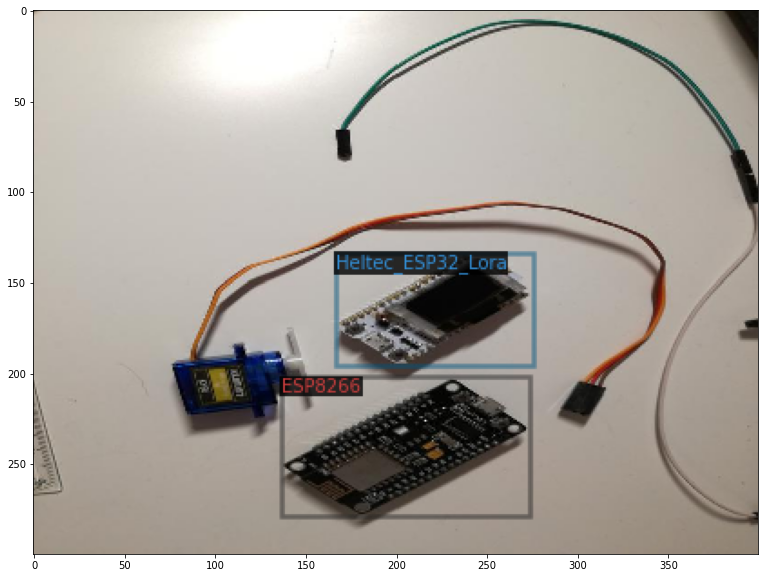

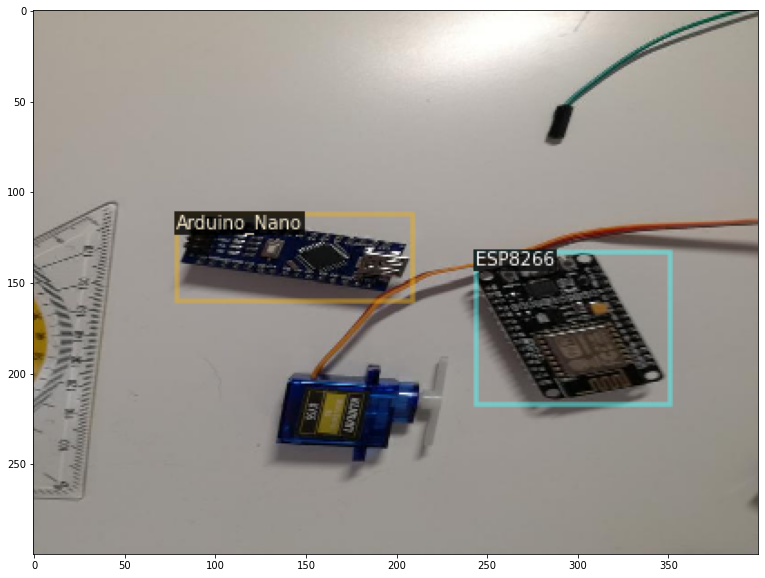

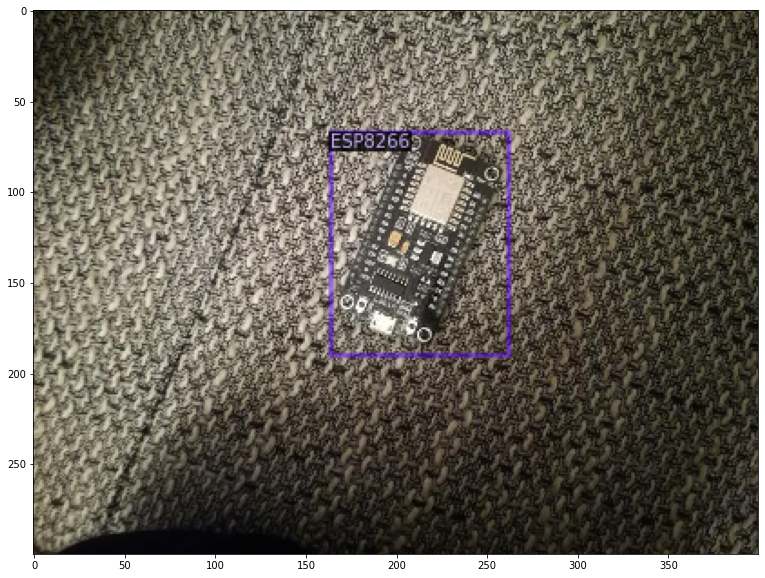

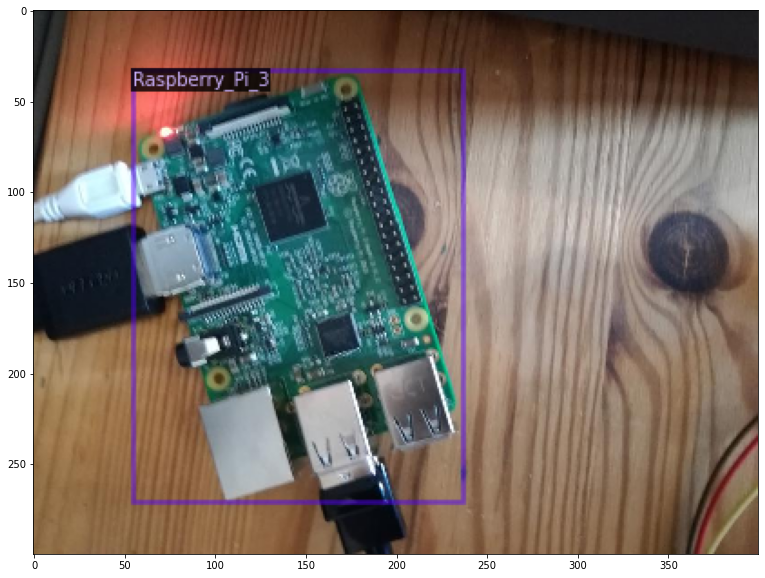

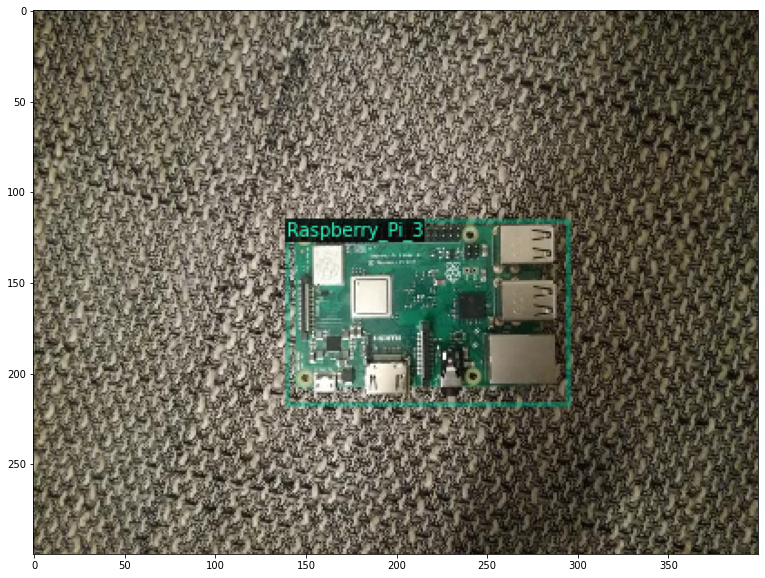

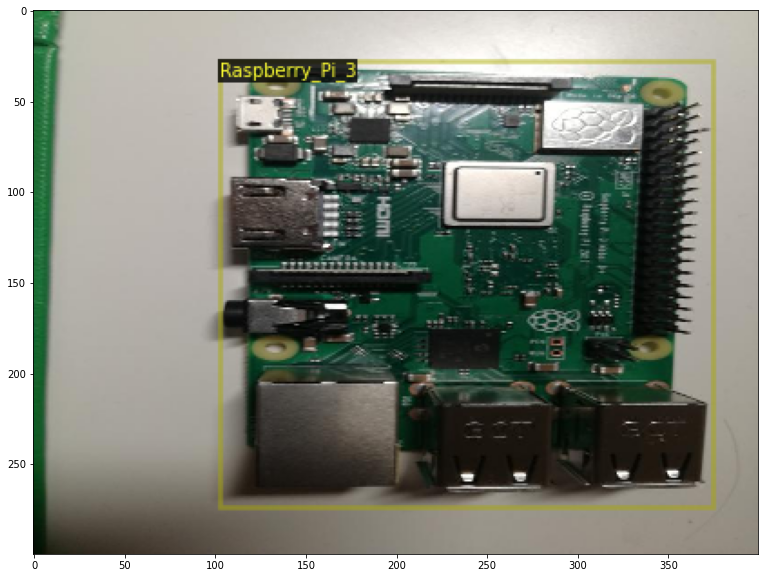

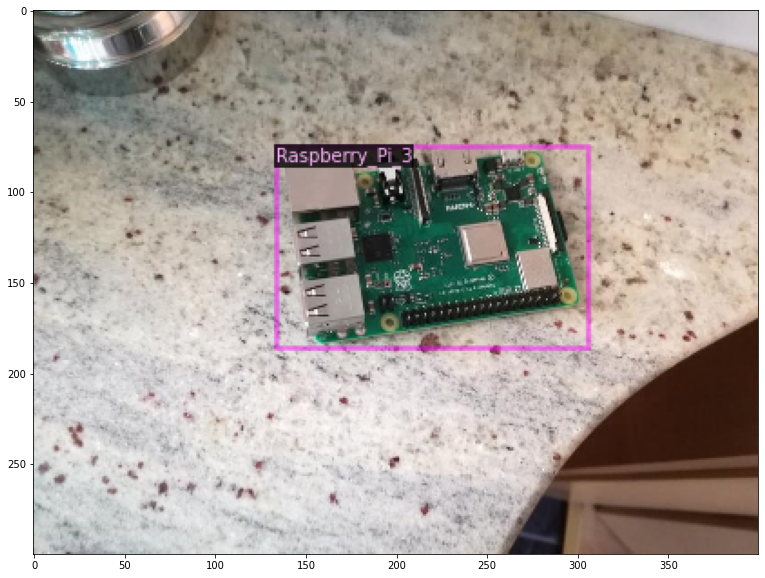

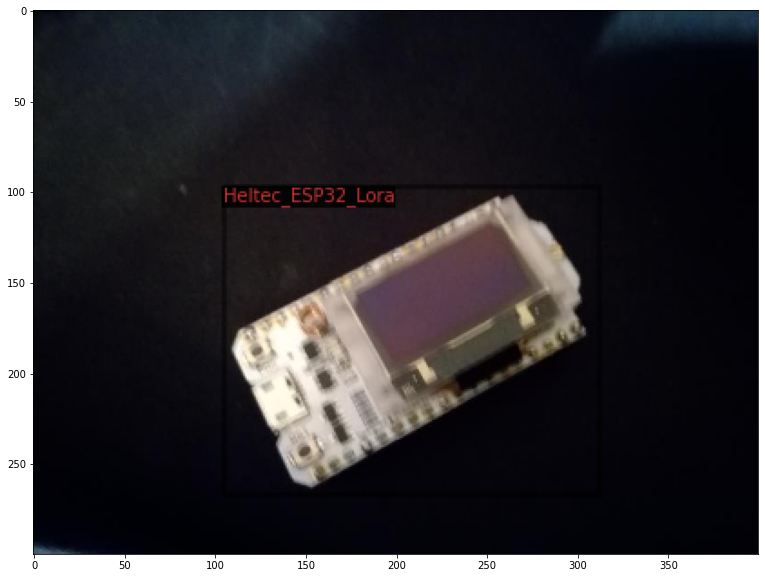

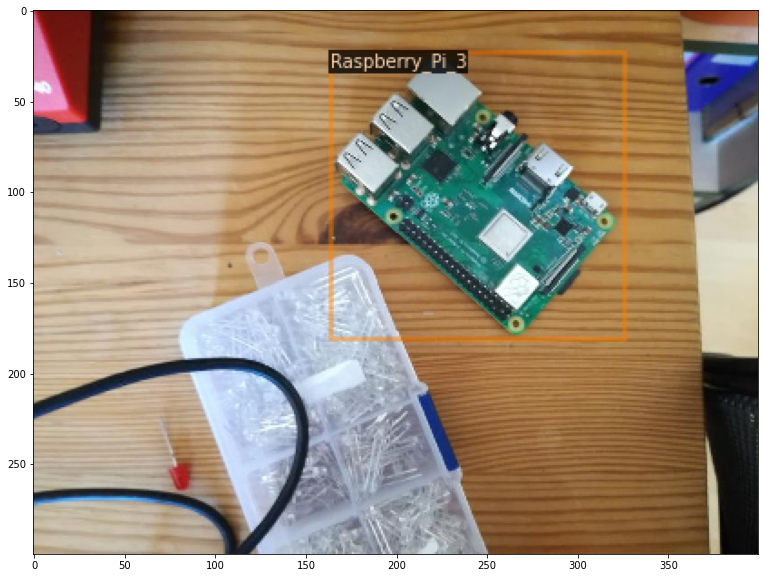

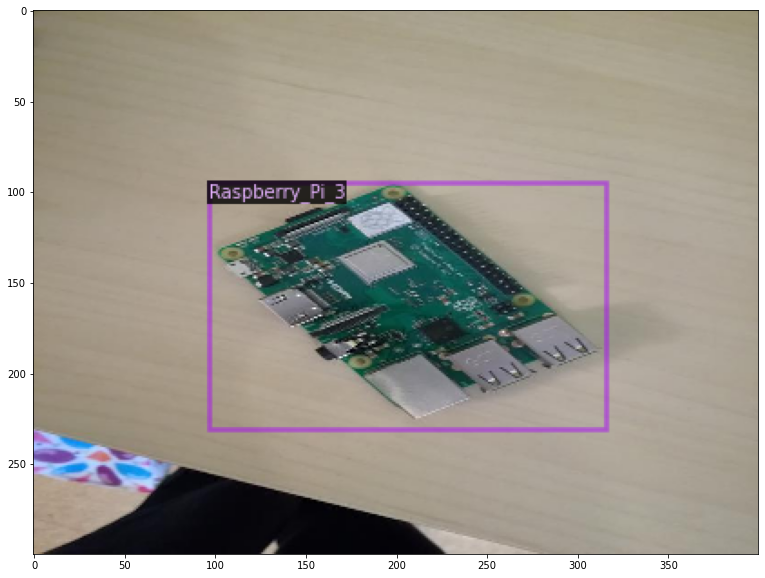

In [12]:
import random
import matplotlib.pyplot as plt
from detectron2.utils.visualizer import Visualizer

dataset_dicts = DatasetCatalog.get('microcontroller_train')
for d in random.sample(dataset_dicts, 10):
    img = cv2.imread(d["file_name"])
    v = Visualizer(img[:, :, ::-1], metadata=microcontroller_metadata, scale=0.5)
    v = v.draw_dataset_dict(d)
    plt.figure(figsize = (14, 10))
    plt.imshow(cv2.cvtColor(v.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB))
    plt.show()

## Train model

Now, let's fine-tune a pretrained FasterRCNN object detection model to detect the different microcontrollers.

In [13]:
from d2go.runner import GeneralizedRCNNRunner
from d2go.model_zoo import model_zoo

def prepare_for_launch():
    runner = GeneralizedRCNNRunner()
    cfg = runner.get_default_cfg()
    cfg.merge_from_file(model_zoo.get_config_file("faster_rcnn_fbnetv3a_C4.yaml"))
    cfg.MODEL_EMA.ENABLED = False
    cfg.DATASETS.TRAIN = ("microcontroller_train",)
    cfg.DATASETS.TEST = ("microcontroller_test",)
    cfg.DATALOADER.NUM_WORKERS = 2
    cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("faster_rcnn_fbnetv3a_C4.yaml")
    cfg.SOLVER.IMS_PER_BATCH = 2
    cfg.SOLVER.BASE_LR = 0.01
    cfg.SOLVER.MAX_ITER = 1000
    cfg.SOLVER.STEPS = []        # do not decay learning rate   
    cfg.SOLVER.WARMUP_ITERS = 1500  
    cfg.MODEL.ROI_HEADS.NUM_CLASSES = 4 
    os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
    return cfg, runner

cfg, runner = prepare_for_launch()
model = runner.build_model(cfg)
runner.do_train(cfg, model, resume=False)

Arguments ['width_divisor', 'dw_skip_bnrelu', 'zero_last_bn_gamma'] skipped for op Conv2d
model_final.pth: 74.3MB [00:02, 29.6MB/s]                            
Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 200) in the checkpoint but (5, 200) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (5,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 200) in the checkpoint but (16, 200) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (16,) in the model! You might want to double check if this is expected.


[08/13 08:52:39 d2.data.build]: Removed 0 images with no usable annotations. 142 images left.
[08/13 08:52:39 d2.data.build]: Distribution of instances among all 4 categories:
|   category    | #instances   |   category   | #instances   |  category  | #instances   |
|:-------------:|:-------------|:------------:|:-------------|:----------:|:-------------|
| Raspberry_P.. | 42           | Arduino_Nano | 41           |  ESP8266   | 45           |
| Heltec_ESP3.. | 42           |              |              |            |              |
|     total     | 170          |              |              |            |              |
[08/13 08:52:39 d2.data.build]: Using training sampler TrainingSampler
[08/13 08:52:39 d2.data.common]: Serializing 142 elements to byte tensors and concatenating them all ...
[08/13 08:52:39 d2.data.common]: Serialized dataset takes 0.04 MiB
[08/13 08:52:40 d2.engine.train_loop]: Starting training from iteration 0
[08/13 08:52:51 d2.utils.events]:  eta: 0:05:48  ite

{'model_final': CfgNode({'VERSION': 2, 'MODEL': CfgNode({'LOAD_PROPOSALS': False, 'MASK_ON': False, 'KEYPOINT_ON': False, 'DEVICE': 'cuda', 'META_ARCHITECTURE': 'GeneralizedRCNN', 'WEIGHTS': './output/model_final.pth', 'PIXEL_MEAN': [103.53, 116.28, 123.675], 'PIXEL_STD': [1.0, 1.0, 1.0], 'BACKBONE': CfgNode({'NAME': 'FBNetV2C4Backbone', 'FREEZE_AT': 2}), 'FPN': CfgNode({'IN_FEATURES': [], 'OUT_CHANNELS': 256, 'NORM': '', 'FUSE_TYPE': 'sum'}), 'PROPOSAL_GENERATOR': CfgNode({'NAME': 'RPN', 'MIN_SIZE': 0}), 'ANCHOR_GENERATOR': CfgNode({'NAME': 'DefaultAnchorGenerator', 'SIZES': [[32, 64, 96, 128, 160]], 'ASPECT_RATIOS': [[0.5, 1.0, 2.0]], 'ANGLES': [[-90, 0, 90]], 'OFFSET': 0.0}), 'RPN': CfgNode({'HEAD_NAME': 'FBNetV2RpnHead', 'IN_FEATURES': ['trunk3'], 'BOUNDARY_THRESH': -1, 'IOU_THRESHOLDS': [0.3, 0.7], 'IOU_LABELS': [0, -1, 1], 'BATCH_SIZE_PER_IMAGE': 256, 'POSITIVE_FRACTION': 0.5, 'BBOX_REG_LOSS_TYPE': 'smooth_l1', 'BBOX_REG_LOSS_WEIGHT': 1.0, 'BBOX_REG_WEIGHTS': (1.0, 1.0, 1.0, 1.0)

In [14]:
!ls -lah {os.path.join(cfg.OUTPUT_DIR, "model_final.pth")}

-rw-r--r-- 1 root root 41M Aug 13 08:58 ./output/model_final.pth


## Inference & evaluation using the trained model

Now, let's run inference with the trained model on the microcontroller validation dataset.

In [15]:
metrics = runner.do_test(cfg, model)

[08/13 08:58:50 d2.data.common]: Serializing 7 elements to byte tensors and concatenating them all ...
[08/13 08:58:50 d2.data.common]: Serialized dataset takes 0.00 MiB
[08/13 08:58:50 d2.evaluation.evaluator]: Start inference on 7 batches
[08/13 08:58:59 d2.evaluation.evaluator]: Total inference time: 0:00:01.665255 (0.832628 s / iter per device, on 1 devices)
[08/13 08:58:59 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.043283 s / iter per device, on 1 devices)
[08/13 08:58:59 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[08/13 08:58:59 d2.evaluation.coco_evaluation]: Saving results to ./output/inference/default/final/microcontroller_test/coco_instances_results.json
[08/13 08:58:59 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[08/13 08:58:59 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[08/13 08:58:

The evaluation results are

In [16]:
print(metrics)

OrderedDict([('default', OrderedDict([('microcontroller_test', OrderedDict([('bbox', {'AP': 6.172327003241991, 'AP50': 15.381868609292646, 'AP75': 0.0, 'APs': nan, 'APm': nan, 'APl': 6.703409311519387, 'AP-Raspberry_Pi_3': 0.5405405405405406, 'AP-Arduino_Nano': 14.330829634687605, 'AP-ESP8266': 2.2436804119972433, 'AP-Heltec_ESP32_Lora': 7.574257425742574})]))]))])


## Make predictions with Detectron2 model

In [17]:
from detectron2.engine import DefaultPredictor

cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5   # set the testing threshold for this model
predictor = DefaultPredictor(cfg)

Arguments ['width_divisor', 'dw_skip_bnrelu', 'zero_last_bn_gamma'] skipped for op Conv2d


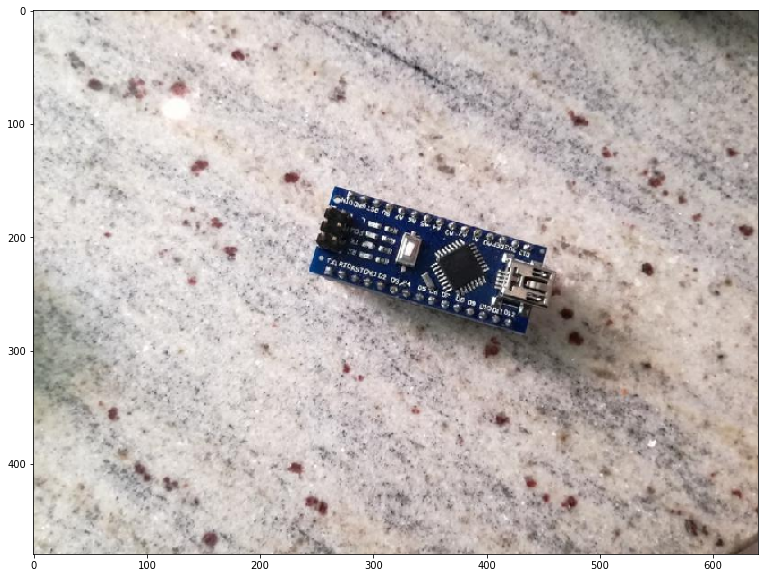

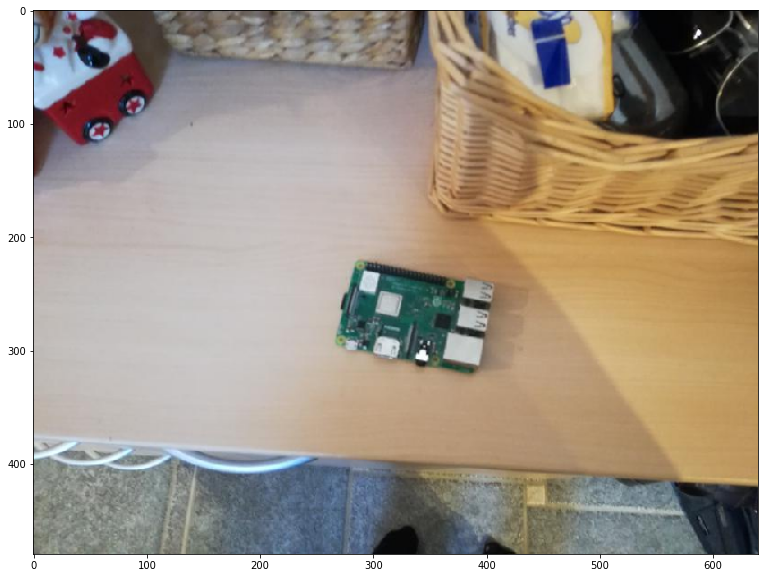

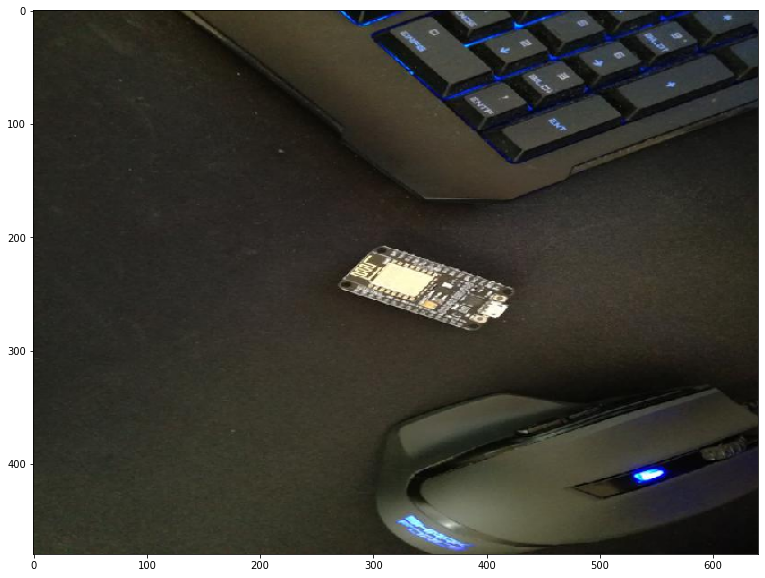

In [18]:
from detectron2.utils.visualizer import ColorMode
import random

dataset_dicts = DatasetCatalog.get('microcontroller_train')
for d in random.sample(dataset_dicts, 3):    
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1], metadata=microcontroller_metadata, scale=0.8)
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    plt.figure(figsize = (14, 10))
    plt.imshow(cv2.cvtColor(v.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB))
    plt.show()

## Export to Int8 Model
This section export int8 models using post-training quantization. For quantization-aware training, please see the [instructions](https://github.com/facebookresearch/d2go/tree/master/demo#quantization-aware-training).

In [19]:
import copy
from detectron2.data import build_detection_test_loader
from d2go.export.api import convert_and_export_predictor
from d2go.export.d2_meta_arch import patch_d2_meta_arch

import logging

# disable all the warnings
previous_level = logging.root.manager.disable
logging.disable(logging.INFO)

patch_d2_meta_arch()

pytorch_model = runner.build_model(cfg, eval_only=True)
pytorch_model.cpu()

datasets = cfg.DATASETS.TRAIN[0]
data_loader = runner.build_detection_test_loader(cfg, datasets)

predictor_path = convert_and_export_predictor(
  copy.deepcopy(cfg),
  copy.deepcopy(pytorch_model),
  "torchscript_int8@tracing",
  './',
  data_loader
)

# recover the logging level
logging.disable(previous_level)

Arguments ['width_divisor', 'dw_skip_bnrelu', 'zero_last_bn_gamma'] skipped for op Conv2d
/usr/local/lib/python3.7/dist-packages/torch/quantization/observer.py:124: UserWarning: Please use quant_min and quant_max to specify the range for observers.                     reduce_range will be deprecated in a future release of PyTorch.
  reduce_range will be deprecated in a future release of PyTorch."
/usr/local/lib/python3.7/dist-packages/detectron2/structures/image_list.py:90: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  assert t.shape[:-2] == tensors[0].shape[:-2], t.shape
/usr/local/lib/python3.7/dist-packages/detectron2/structures/boxes.py:158: TracerWarning: torch.as_tensor results are registered as constants in the trace. You can safely ignore this warning if you us

In [20]:
!ls -lah {predictor_path}

total 7.5M
drwxr-xr-x 2 root root 4.0K Aug 13 08:59 .
drwxr-xr-x 1 root root 4.0K Aug 13 08:59 ..
-rw-r--r-- 1 root root 786K Aug 13 08:59 data.pth
-rw-r--r-- 1 root root 6.7M Aug 13 08:59 model.jit
-rw-r--r-- 1 root root 1.8K Aug 13 08:59 predictor_info.json


Create the predictor using the exported int8 model

In [21]:
from mobile_cv.predictor.api import create_predictor
model = create_predictor(predictor_path)

Make predictions and Visualize the output

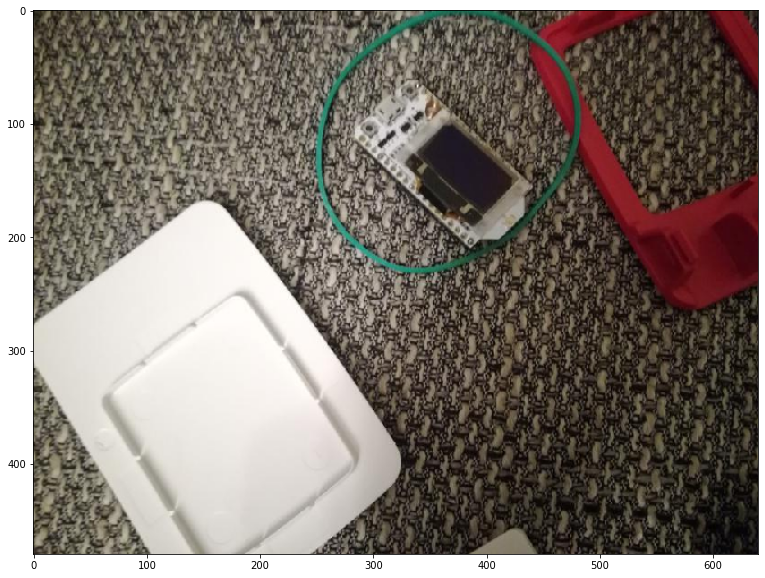

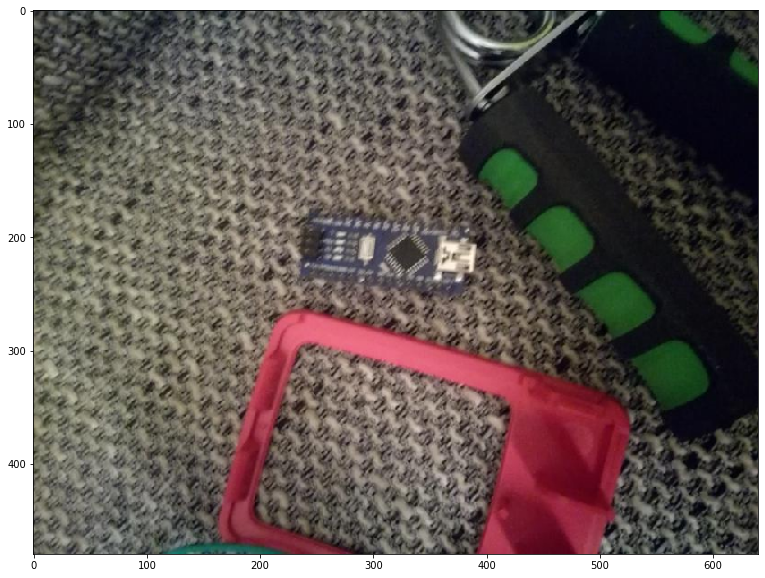

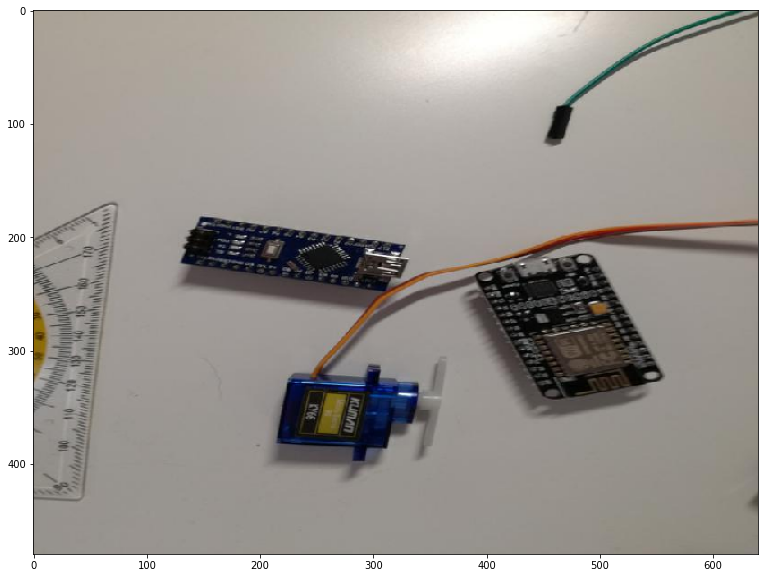

In [22]:
from d2go.utils.demo_predictor import DemoPredictor

predictor = DemoPredictor(model)

dataset_dicts = DatasetCatalog.get('microcontroller_train')
for d in random.sample(dataset_dicts, 3):    
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1], metadata=microcontroller_metadata, scale=0.8)
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    plt.figure(figsize = (14, 10))
    plt.imshow(cv2.cvtColor(v.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB))
    plt.show()